#EDA - Exploratory Data Analysis

In [1]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

plt.style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("vgsales.csv")

In [3]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
print(f"This dataset have {data.shape[0]} rows and {data.shape[1]} columns.")

This dataset have 12819 rows and 11 columns.


In [7]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12819 entries, 0 to 12818
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          12819 non-null  int64  
 1   Name          12819 non-null  object 
 2   Platform      12819 non-null  object 
 3   Year          12616 non-null  float64
 4   Genre         12819 non-null  object 
 5   Publisher     12783 non-null  object 
 6   NA_Sales      12818 non-null  float64
 7   EU_Sales      12818 non-null  float64
 8   JP_Sales      12818 non-null  float64
 9   Other_Sales   12818 non-null  float64
 10  Global_Sales  12818 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [14]:
print("[INFO] Dataset Features Types")
print("-------------------------------------")
print(f"This dataset have {len(list(data.select_dtypes(['category', 'object'])))} Textual columns.")
print(f"This dataset have {len(list(data.select_dtypes(['int', 'float'])))} Numerical columns.")

[INFO] Dataset Features Types
-------------------------------------
This dataset have 4 Textual columns.
This dataset have 7 Numerical columns.


In [16]:
print(f"** This dataset have {data.isnull().sum().sum()} null values.")

** This dataset have 244 null values.


In [17]:
cleaned = data.dropna(axis=0)

In [19]:
print(f"[INFO] Cleaned dataset have {cleaned.shape[0]} rows and {cleaned.shape[1]} columns.")

[INFO] Cleaned dataset have 12590 rows and 11 columns.


In [22]:
cleaned['Year'] = cleaned['Year'].astype('int')

In [24]:
cleaned.sample(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2261,2263,Disney Magical World,3DS,2013,Adventure,Nintendo,0.16,0.20,0.53,0.03,0.92
9436,9438,Shaman King: Power of Spirit,PS2,2004,Adventure,Konami Digital Entertainment,0.06,0.05,0.00,0.02,0.13


In [25]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,12819.00000,12616.000000,12818.000000,12818.000000,12818.000000,12818.000000,12818.000000
mean,6410.94906,2005.919388,0.339915,0.187966,0.097431,0.062000,0.687387
std,3700.75463,5.994138,0.915835,0.568481,0.349437,0.212602,1.741401
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.060000
25%,3206.50000,2002.000000,0.050000,0.000000,0.000000,0.010000,0.130000
50%,6411.00000,2007.000000,0.130000,0.040000,0.000000,0.020000,0.270000
75%,9615.50000,2010.000000,0.320000,0.160000,0.060000,0.050000,0.630000
max,12820.00000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [26]:
corr = data.corr()

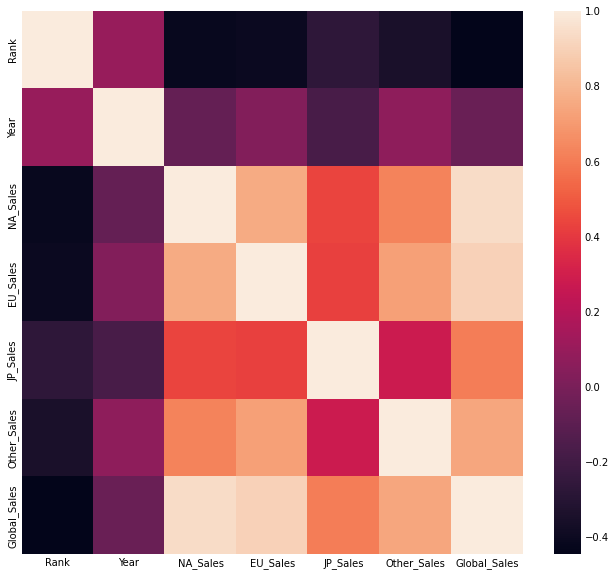

In [27]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

How many different Genres?

In [31]:
def divider():
  print("-----------------------------------------------------")

In [33]:
divider()
print(f"This dataset have {len(list(cleaned['Genre'].unique()))} different Genres.")

-----------------------------------------------------
This dataset have 12 different Genres.


Text(0, 0.5, 'Genres')

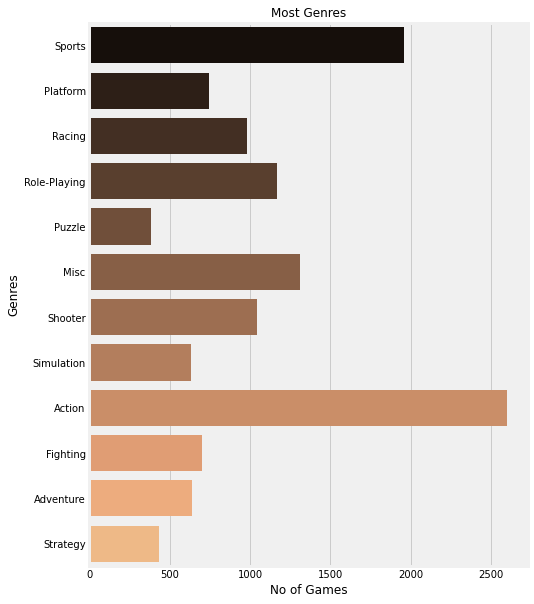

In [45]:
plt.figure(figsize=(7, 10))
sns.countplot(y="Genre", data=cleaned, palette="copper")
plt.title("Most Genres", fontsize=12)
plt.xlabel("No of Games")
plt.ylabel("Genres")

In [36]:
divider()
print(f"This dataset have {len(list(cleaned['Publisher'].unique()))} different Publishers.")

-----------------------------------------------------
This dataset have 422 different Publishers.


In [38]:
divider()
print(f"This dataset have {len(list(cleaned['Platform'].unique()))} different Platforms.")

-----------------------------------------------------
This dataset have 29 different Platforms.


Text(0, 0.5, 'Platforms')

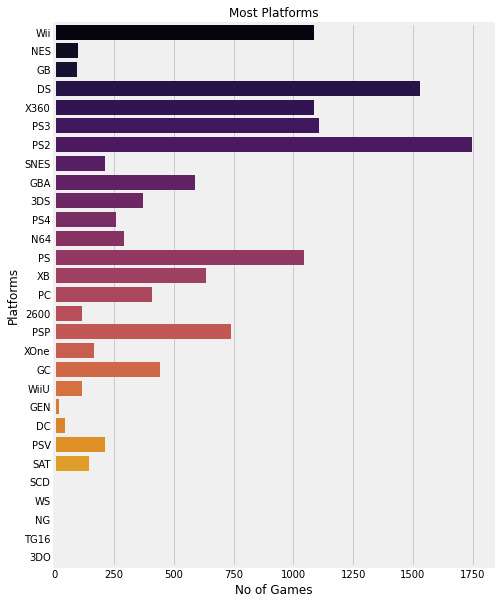

In [46]:
plt.figure(figsize=(7, 10))
sns.countplot(y="Platform", data=cleaned, palette="inferno")
plt.title("Most Platforms", fontsize=12)
plt.xlabel("No of Games")
plt.ylabel("Platforms")

In [47]:
cleaned.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In which year most games published?

In [142]:
pb_y = cleaned['Year'].value_counts().reset_index()

In [145]:
pb_y = pb_y[pb_y['Year']==pb_y['Year'].max()]

In [147]:
divider()
print(f"In {pb_y['index'].values[0]} most games {pb_y['Year'].values[0]} published.")

-----------------------------------------------------
In 2008 most games 1088 published.


Text(0, 0.5, 'Year')

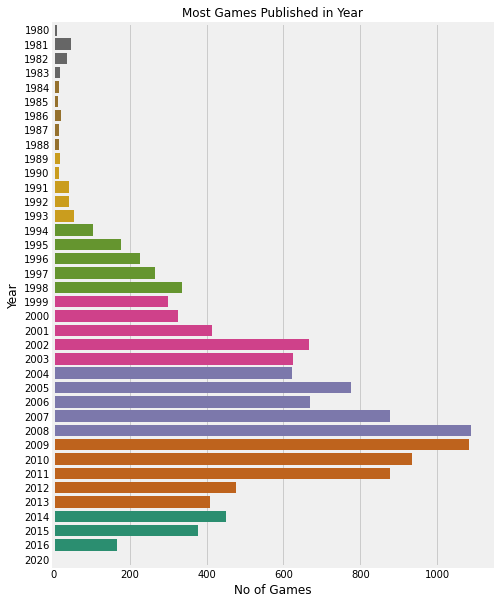

In [131]:
plt.figure(figsize=(7, 10))
sns.countplot(y="Year", data=cleaned, palette="Dark2_r")
plt.title("Most Games Published in Year", fontsize=12)
plt.xlabel("No of Games")
plt.ylabel("Year")

In [79]:
cleaned.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [80]:
# Drop any duplicate rows
cleaned.drop_duplicates(inplace=True)
# I set the rank as the index for dataset
cleaned.set_index('Rank', inplace=True)

In [81]:
cleaned.shape

(12590, 10)

In [82]:
cleaned.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [96]:
sales_na = cleaned.groupby('Platform', as_index=False)['NA_Sales'].sum()
sales_na.sample(2)

,Platform,NA_Sales
21,SNES,61.23
18,PSV,15.85


Text(0.5, 0, 'Platform')

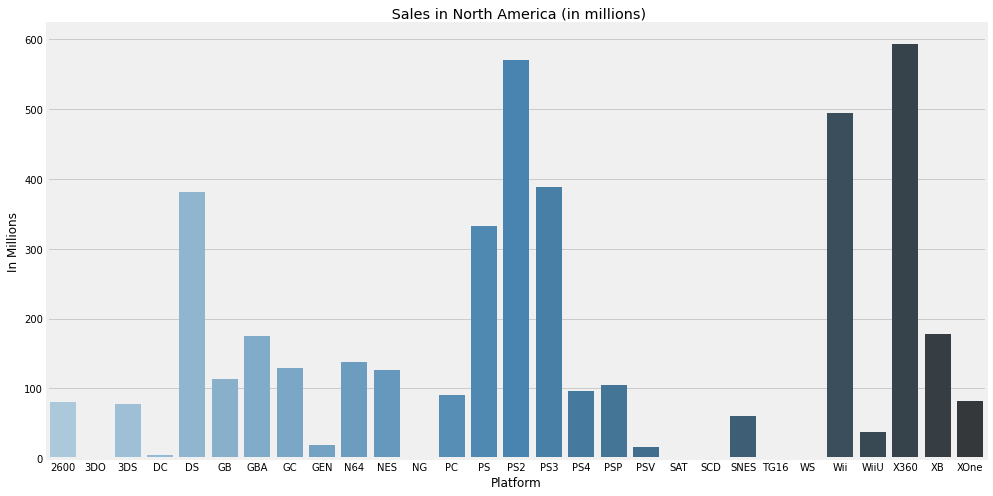

In [100]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Platform", y="NA_Sales", data=sales_na,
                 palette="Blues_d")
plt.title(" Sales in North America (in millions)")
plt.ylabel("In Millions")
plt.xlabel("Platform")

- We can see that X360 has most sales in North America.

In [99]:
sales_eu = cleaned.groupby('Platform', as_index=False)['EU_Sales'].sum()
sales_eu.sample(2)

,Platform,EU_Sales
9,N64,40.89
11,NG,0.00


Text(0.5, 0, 'Platform')

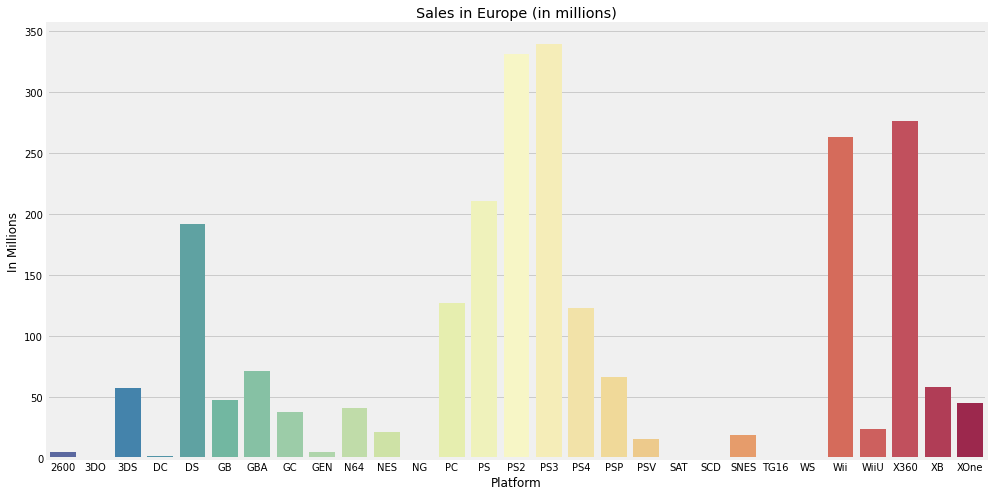

In [102]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Platform", y="EU_Sales", data=sales_eu,
                 palette="Spectral_r")
plt.title("Sales in Europe (in millions)")
plt.ylabel("In Millions")
plt.xlabel("Platform")

- We can see that PS3 has most sales in Europe.

In [103]:
sales_jp = cleaned.groupby('Platform', as_index=False)['JP_Sales'].sum()
sales_jp.sample(2)

,Platform,JP_Sales
5,GB,85.12
25,WiiU,12.62


Text(0.5, 0, 'Platform')

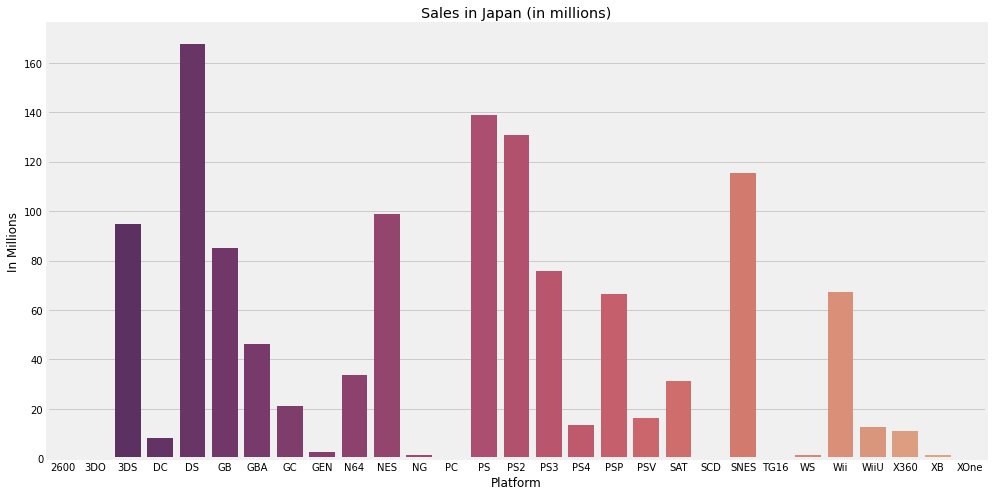

In [106]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Platform", y="JP_Sales", data=sales_jp,
                 palette="flare_r")
plt.title("Sales in Japan (in millions)")
plt.ylabel("In Millions")
plt.xlabel("Platform")

- We can see that DS has most sales in Japan.

In [107]:
sales_ot = cleaned.groupby('Platform', as_index=False)['Other_Sales'].sum()
sales_ot.sample(2)

,Platform,Other_Sales
26,X360,84.6
1,3DO,0.0


Text(0.5, 0, 'Platform')

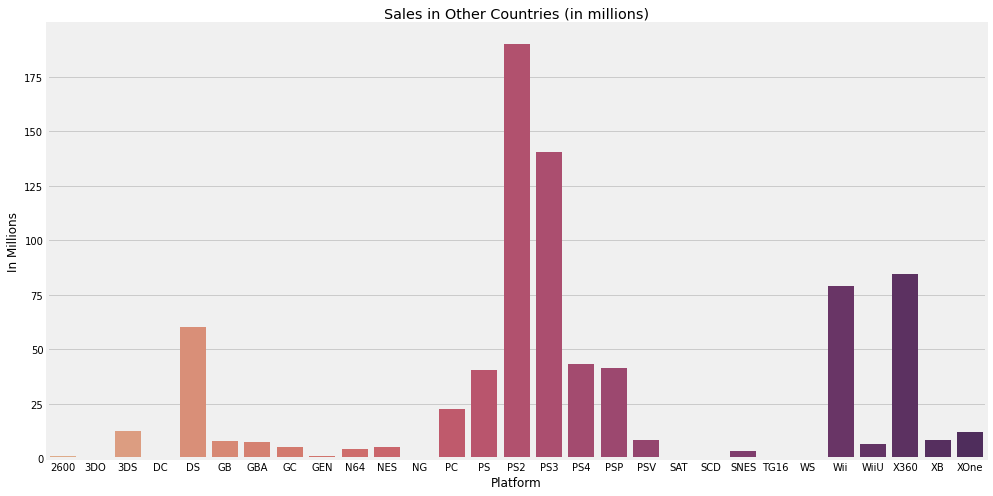

In [110]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Platform", y="Other_Sales", data=sales_ot,
                 palette="flare")
plt.title("Sales in Other Countries (in millions)")
plt.ylabel("In Millions")
plt.xlabel("Platform")

- We can see that PS2 has most sales in Other Countries.

In [111]:
sales_gl = cleaned.groupby('Platform', as_index=False)['Global_Sales'].sum()
sales_gl.sample(2)

,Platform,Global_Sales
17,PSP,279.42
21,SNES,199.00


Text(0.5, 0, 'Platform')

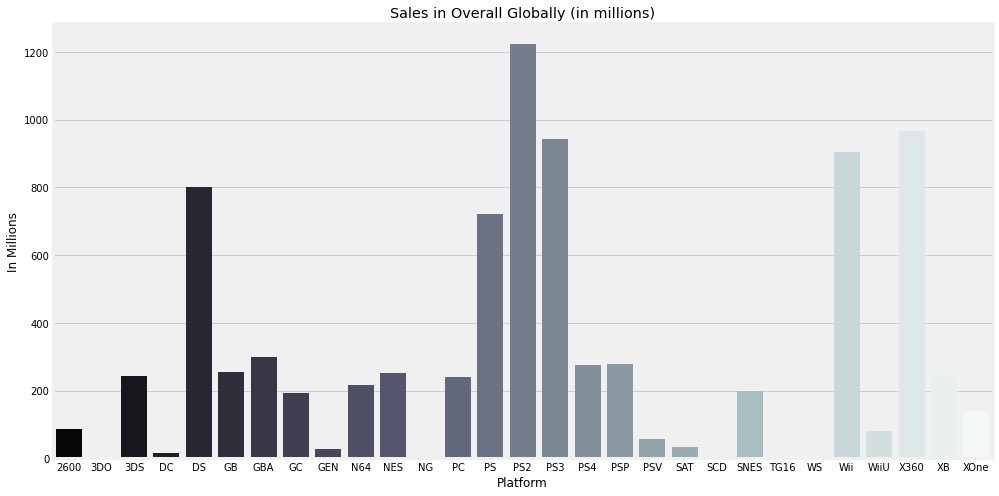

In [113]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Platform", y="Global_Sales", data=sales_gl,
                 palette="bone")
plt.title("Sales in Overall Globally (in millions)")
plt.ylabel("In Millions")
plt.xlabel("Platform")

- We can see that PS2 has most sales globally.

In [119]:
most_sales_pub = cleaned.groupby('Publisher', as_index=False)['Global_Sales'].sum().sort_values(by='Global_Sales', ascending=False)

In [124]:
pub_sales = most_sales_pub[most_sales_pub['Global_Sales']==most_sales_pub['Global_Sales'].max()]

In [128]:
divider()
print(f"[INFO] {pub_sales['Publisher'].values[0]} has most sales globally of {pub_sales['Global_Sales'].values[0]} millions($).")

-----------------------------------------------------
[INFO] Nintendo has most sales globally of 1783.53 millions($).


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [149]:
gen_sales_gl = cleaned.groupby('Genre', as_index=False)['Global_Sales'].sum()

Text(0.5, 0, 'Genre')

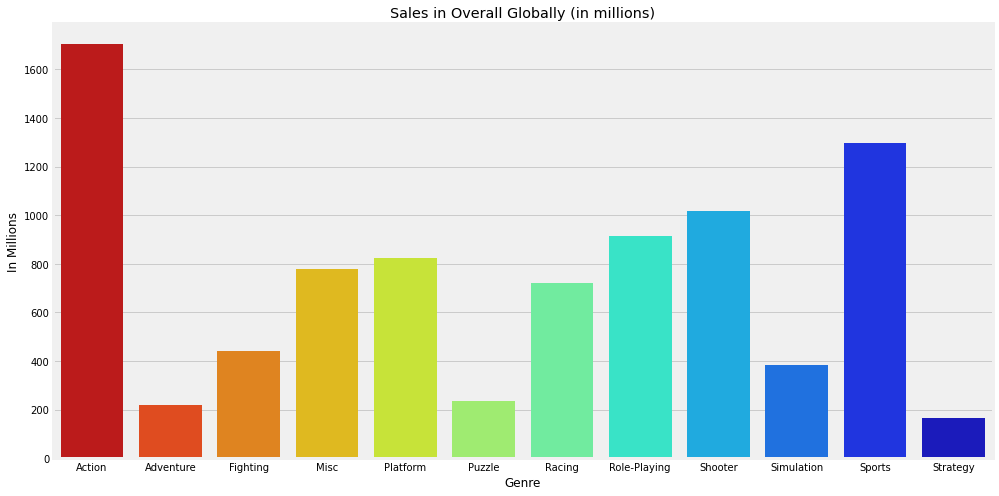

In [153]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Genre", y="Global_Sales", data=gen_sales_gl,
                 palette="jet_r")
plt.title("Sales in Overall Globally (in millions)")
plt.ylabel("In Millions")
plt.xlabel("Genre")

- We can see that Action Genre has more sales Globally.

In [154]:
cleaned.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [163]:
most_saled_game = cleaned[['Name', 'Global_Sales']][cleaned['Global_Sales'] == cleaned['Global_Sales'].max()]

In [165]:
divider()
print(f"[INFO] {most_saled_game['Name'].values[0]} has most sales of {most_saled_game['Global_Sales'].values[0]}millions($) around globally.")

-----------------------------------------------------
[INFO] Wii Sports has most sales of 82.74millions($) around globally.


In [167]:
total_sales_genre = cleaned.groupby('Genre', as_index=False)[['JP_Sales', 'Global_Sales', 'EU_Sales', 'NA_Sales', 'Other_Sales']].sum()

Text(0, 0.5, 'In Millions')

<Figure size 1080x576 with 0 Axes>

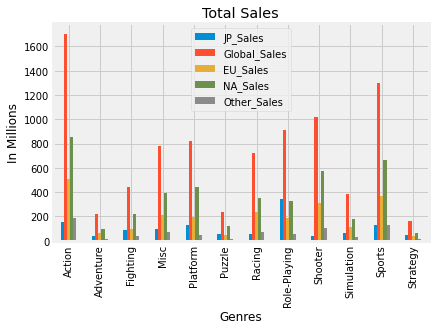

In [182]:
plt.figure(figsize=(15, 8))
total_sales_genre.plot(kind="bar")
plt.title("Total Sales")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], list(total_sales_genre['Genre'].values))
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
plt.xlabel("Genres")
plt.ylabel("In Millions")

EDA By Muhammad Hanan Asghar